# Temperature rise for random countries 

Here we give users the opportunity to see the trend in temperature for a number of randomly selected countries:

In [1]:
    import wget
    import os
    import zipfile
    
    import urllib3
    import certifi
    import sys
    import glob
    
    import numpy as np
    import pandas as pd
    
    import matplotlib.pyplot as plt
    
    %matplotlib inline


    import plotly.offline as py
    import plotly.graph_objs as go
    import plotly.tools as tls
    import seaborn as sns
    
    import plotly
    plotly.offline.init_notebook_mode()
  

In [2]:
zf = zipfile.ZipFile('../data/GlobalLandTemperatures.zip')

In [3]:
countries = pd.read_csv(zf.open('GlobalLandTemperaturesByCountry.csv'), parse_dates=['dt'])
countries.Country = countries.Country.str.cat(countries.Country, sep=' ')
countries = countries[countries.dt.dt.year >= 1900]
countries.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1874,1900-01-01,-3.026,0.538,Åland Åland
1875,1900-02-01,-8.063,0.657,Åland Åland
1876,1900-03-01,-3.196,0.467,Åland Åland
1877,1900-04-01,0.781,0.224,Åland Åland
1878,1900-05-01,4.960,0.503,Åland Åland


In [4]:
country_means = countries.groupby(['Country', countries.dt.dt.year])['AverageTemperature'].mean().unstack()
country_mins = countries.groupby(['Country', countries.dt.dt.year])['AverageTemperature'].min().unstack()
country_maxs = countries.groupby(['Country', countries.dt.dt.year])['AverageTemperature'].max().unstack()
country_means.head()

dt,1900,1901,1902,1903,1904,1905,1906,1907,1908,1909,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan Afghanistan,13.749333,13.894000,14.505833,12.986417,13.805750,13.385667,13.884917,13.352917,13.699167,13.925417,...,15.770917,14.980000,15.595583,15.106167,15.216500,15.257750,15.828667,15.518000,14.481583,16.533625
Africa Africa,23.991500,24.081417,23.901917,23.683917,23.330083,23.709667,23.636833,23.376583,23.664917,23.698917,...,24.895917,25.156167,24.818917,24.851500,24.754667,25.026500,25.472500,24.786500,24.725917,25.208750
Albania Albania,13.068583,12.449583,12.482667,12.543833,12.529333,12.163833,12.179750,12.223667,12.247250,12.559833,...,13.258167,12.747083,12.976917,13.890500,13.955167,13.844250,13.775417,13.443250,13.768250,14.993875
Algeria Algeria,22.864167,22.726417,23.052417,22.555667,22.682333,22.560083,22.468583,22.171583,22.829583,22.569833,...,23.916000,24.222583,24.200833,24.065333,23.950250,24.154333,25.215667,24.144167,23.954833,25.121500
American Samoa American Samoa,26.273500,26.144750,26.177500,26.331667,26.057000,26.150417,26.588000,26.004500,26.079500,25.928750,...,27.281167,27.373500,27.081250,27.452417,26.995083,27.034250,27.453417,27.009500,27.201417,27.517250


In [5]:
first_years_mean = country_means.iloc[:, :5].mean(axis=1) # mean temperature for the first 5 years
country_means_shifted = country_means.subtract(first_years_mean, axis=0)

def plot_temps(countries, country_ser, ax):
    first_years_mean = country_ser.iloc[:, :5].mean(axis=1)
    country_ser = country_ser.subtract(first_years_mean, axis=0)
    for city in random_countries:
        row = country_ser.loc[city]
        pd.stats.moments.ewma(row, 10).plot(label=row.name, ax=ax)
    ax.set_xlabel('')
    ax.legend(loc='best')

/Users/sinapi/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:9: FutureWarning:

pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(ignore_na=False,adjust=True,min_periods=0,com=10).mean()



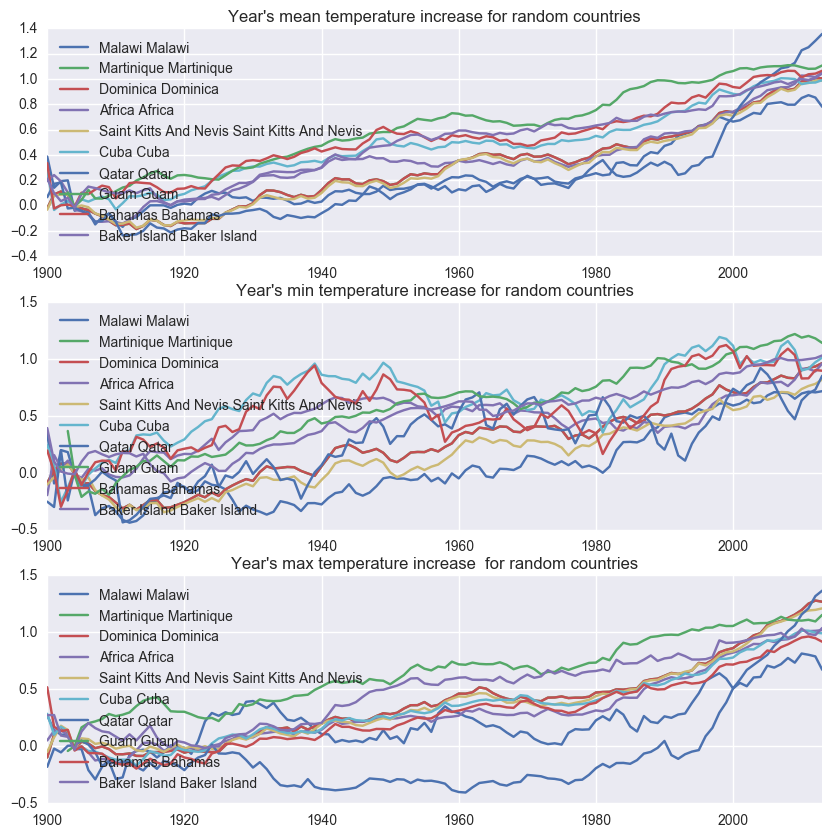

In [7]:
fig, axes = plt.subplots(3,1, figsize=(10,10))

n = 10 # number of random countries you want to see
random_countries = country_means_shifted.sample(n).index

plot_temps(random_countries, country_means, axes[0])
plot_temps(random_countries, country_mins, axes[1])
plot_temps(random_countries, country_maxs, axes[2])

axes[0].set_title("Year's mean temperature increase for random countries")
axes[1].set_title("Year's min temperature increase for random countries")
axes[2].set_title("Year's max temperature increase  for random countries")